ABDULMUEZ NASIR MUSTAFA ASHOUR B2280.060011

Image size: 184 x 184
Target pixel position: 61 61
Original pixel value at target: [ 68 155 253]
New pixel value at target: [168 158  50]


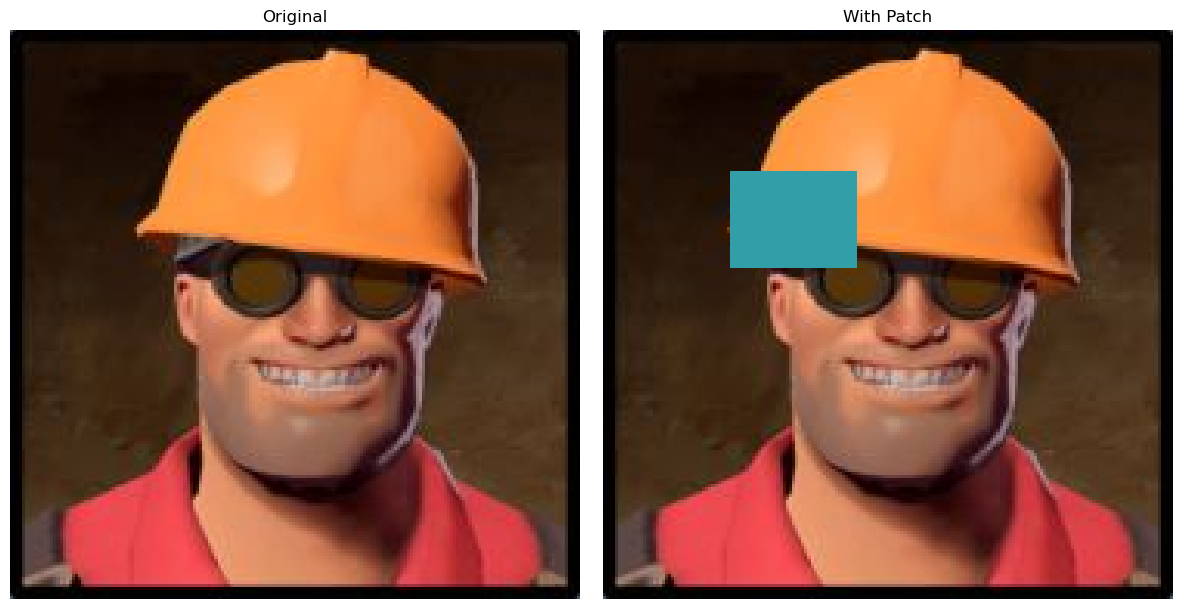

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("tf2_engineer.jpg", cv2.IMREAD_COLOR)

height, width, channels = image.shape
print("Image size:", width, "x", height)
focus_x = width // 3
focus_y = height // 3
print("Target pixel position:", focus_x, focus_y)


before_color = image[focus_y, focus_x]
print("Original pixel value at target:", before_color)


patch_width = 40
patch_height = 30
patch_color_bgr = (168, 158, 50)  

x_start = focus_x - patch_width // 2
y_start = focus_y - patch_height // 2
x_end = focus_x + patch_width // 2
y_end = focus_y + patch_height // 2

patched_image = image.copy()

cv2.rectangle(patched_image, (x_start, y_start), (x_end, y_end), patch_color_bgr, thickness=-1)

after_color = patched_image[focus_y, focus_x]
print("New pixel value at target:", after_color)

original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
patched_rgb = cv2.cvtColor(patched_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(patched_rgb)
plt.title("With Patch")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
this code reads and diplay the original image and find the width and height of it also i used matplotlib.pyplot to show the modified age and the original image side by side


Pixel 1 at (y=139, x=190): Original = 122, Negative = 133
Pixel 2 at (y=284, x=173): Original = 98, Negative = 157
Pixel 3 at (y=389, x=560): Original = 126, Negative = 129
Pixel 4 at (y=62, x=159): Original = 108, Negative = 147
Pixel 5 at (y=48, x=637): Original = 105, Negative = 150


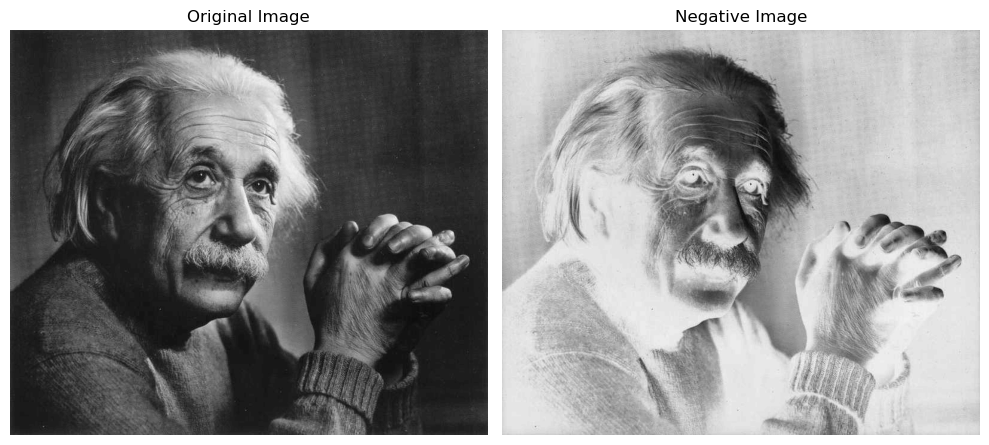

In [7]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

image = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)

negative = 255 - image

height, width = image.shape
for i in range(5):
    y = random.randint(0, height - 1)
    x = random.randint(0, width - 1)
    
    original_value = image[y, x]
    negative_value = negative[y, x]
    
    print(f"Pixel {i+1} at (y={y}, x={x}): Original = {original_value}, Negative = {negative_value}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative, cmap='gray')
plt.title("Negative Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
this code shows the original image in grayscale it also displays the both images the original and the negative image the negative effects as made by simle operations from numby


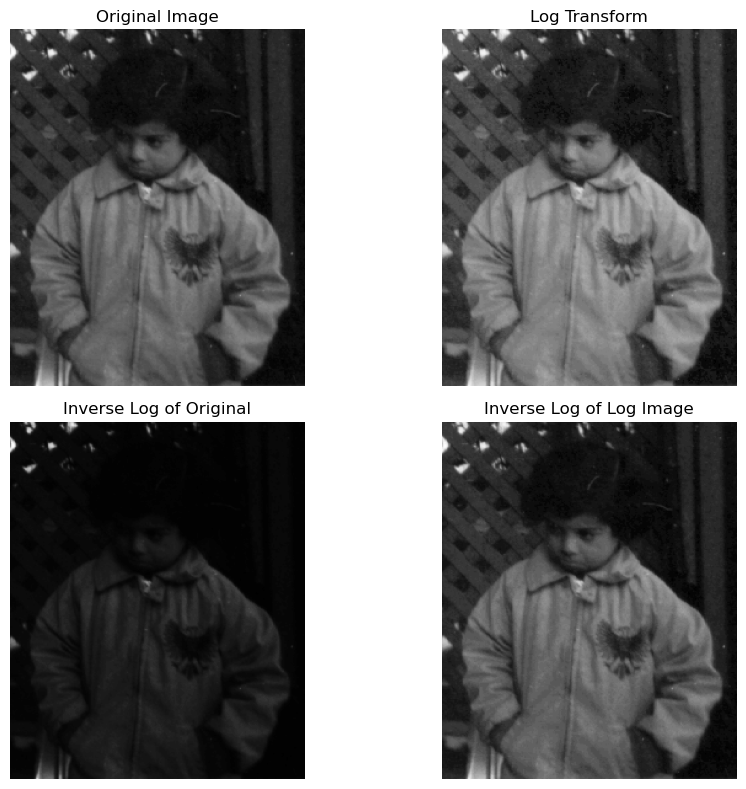

comments on the image from step 2 and 4 
step 2 makes the image brighter in the dark areas 
step 4 brings back the original edits like contrast and brighteness


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

c = 255 / np.log(1 + np.max(image))

log_img = c * np.log(1 + image.astype(np.float32))
log_img = np.uint8(np.clip(log_img, 0, 255))

inv_log_orig = np.exp(image.astype(np.float32) / c) - 1
inv_log_orig = np.uint8(np.clip(inv_log_orig, 0, 255))

inv_log_log = np.exp(log_img.astype(np.float32) / c) - 1
inv_log_log = np.uint8(np.clip(inv_log_log, 0, 255))

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(log_img, cmap='gray')
plt.title("Log Transform")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(inv_log_orig, cmap='gray')
plt.title("Inverse Log of Original")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(inv_log_log, cmap='gray')
plt.title("Inverse Log of Log Image")
plt.axis('off')

plt.tight_layout()
plt.show()
print("comments on the image from step 2 and 4 ")
print("step 2 makes the image brighter in the dark areas ")
print("step 4 brings back the original edits like contrast and brighteness")


In [ ]:
in this code i applyed log transform and inverse log transform on the original image the code the log transform used to enhane the dark regions as shown in the second image i also applyed log inverse in two ways 1 - inverse log on the original image followed by the fourth image which i did The inverse of the log-transformed to help restore the original brightness and contrast values

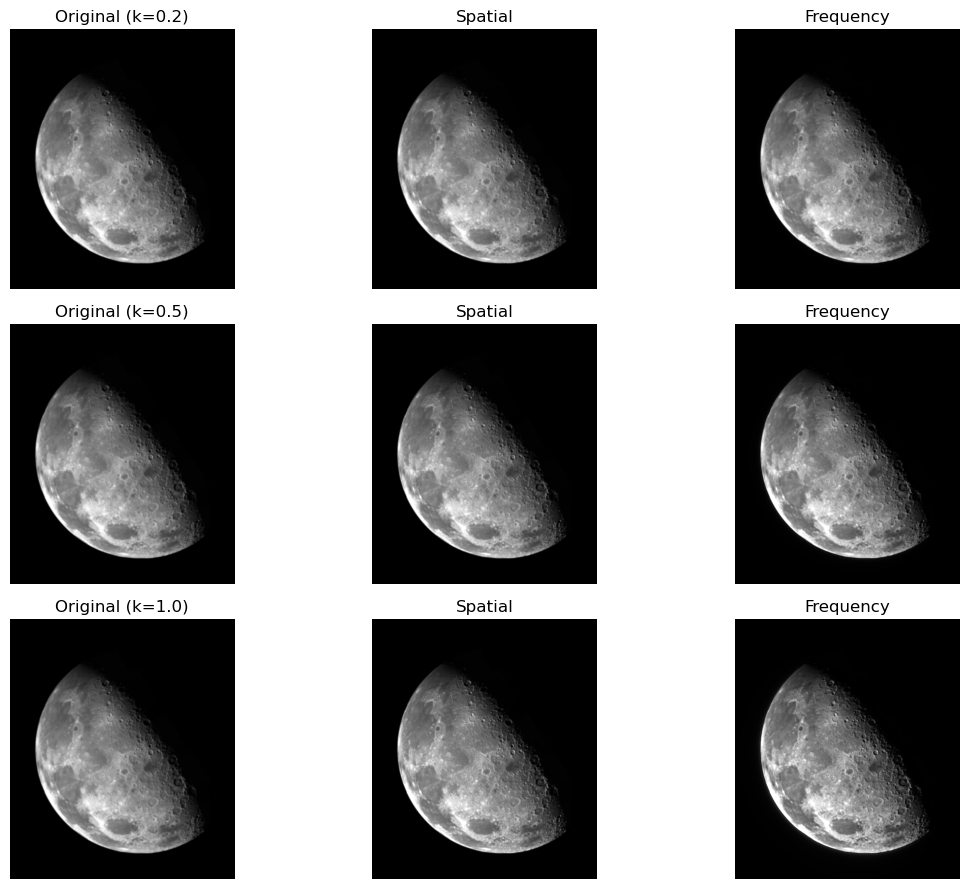

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

moon_img = cv2.imread("moon.tif", cv2.IMREAD_GRAYSCALE)

def sharpen_spatial(img, strength):
    smooth = cv2.GaussianBlur(img, (9, 9), 0)
    detail = cv2.subtract(img, smooth)
    sharp = cv2.addWeighted(img, 1.0, detail, strength, 0)
    return sharp

def sharpen_freq(img, strength, radius=30):
    h, w = img.shape

    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)

    u = np.arange(h)
    v = np.arange(w)
    u, v = np.meshgrid(u - h // 2, v - w // 2, indexing='ij')
    dist = np.sqrt(u**2 + v**2)

    hp_filter = 1 - np.exp(-(dist*2) / (2 * radius*2))

    boosted_fft = (1 + strength * hp_filter) * fft_shift
    back_img = np.fft.ifft2(np.fft.ifftshift(boosted_fft))
    result = np.abs(back_img)
    return np.uint8(np.clip(result, 0, 255))

ks = [0.2, 0.5, 1.0]
spatial_results = [sharpen_spatial(moon_img, k) for k in ks]
freq_results = [sharpen_freq(moon_img, k) for k in ks]


fig, grid = plt.subplots(3, 3, figsize=(12, 9))
for idx in range(3):
    grid[idx, 0].imshow(moon_img, cmap='gray')
    grid[idx, 0].set_title(f"Original (k={ks[idx]})")

    grid[idx, 1].imshow(spatial_results[idx], cmap='gray')
    grid[idx, 1].set_title("Spatial")

    grid[idx, 2].imshow(freq_results[idx], cmap='gray')
    grid[idx, 2].set_title("Frequency")

    for col in range(3):
        grid[idx, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
in this code first i displayed the original image in grayscale and then it shows two images one is shown with the formula of spatial domain using the  (sharpen_spatial) function in the code and  thre diffrint K values :0.2,0.5 1.0 and it uses these three k values for the frequency domain  using the (sharpen_freq) in the code for the output the results are shown in rows to compare the imapges with each others 


In [ ]:
this code display the original image in grayscale and then  I plot its histogram to analyze the distribution of pixel intensities, i used two tybes of filtering to reduce the noice median filter and Gaussian blur the output show three images in a row to compare the original with filtered inmages  

Original photo appears washed out. Histogram shows limited dynamic range.
Mean: 109.08
Standard Deviation: 11.49

Histogram Equalization enhances contrast globally:
Mean: 122.68
Standard Deviation: 77.39

Brightened image shifts intensities rightward in the histogram (overall brightness increase):
Mean: 189.08
Standard Deviation: 11.49


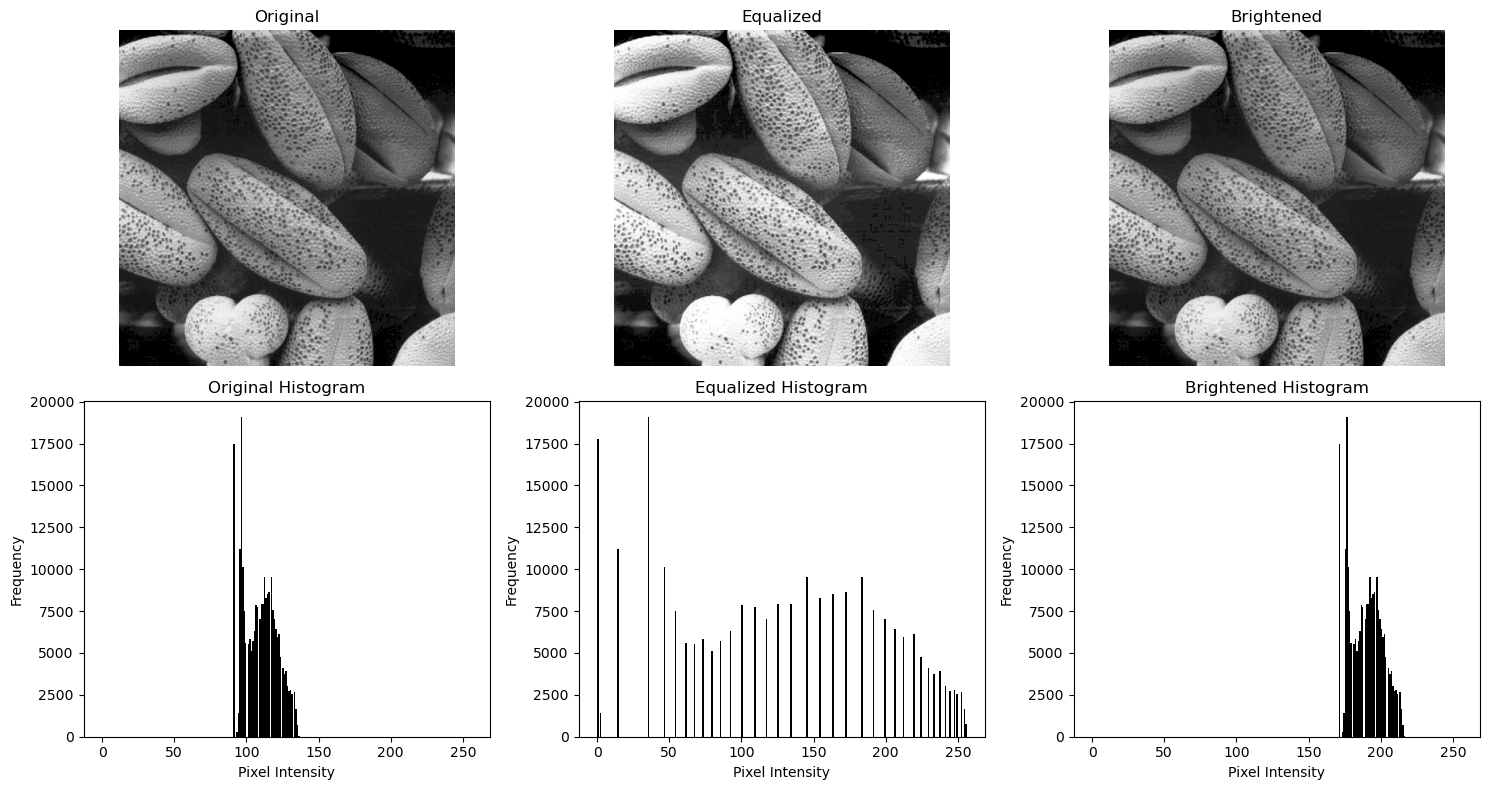

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)

equalized = cv2.equalizeHist(img)
bright_value = 80
brightened = cv2.add(img, bright_value)  

print("Original photo appears washed out. Histogram shows limited dynamic range.")
print(f"Mean: {np.mean(img):.2f}")
print(f"Standard Deviation: {np.std(img):.2f}")

print("\nHistogram Equalization enhances contrast globally:")
print(f"Mean: {np.mean(equalized):.2f}")
print(f"Standard Deviation: {np.std(equalized):.2f}")

print("\nBrightened image shifts intensities rightward in the histogram (overall brightness increase):")
print(f"Mean: {np.mean(brightened):.2f}")
print(f"Standard Deviation: {np.std(brightened):.2f}")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized, cmap='gray')
axes[0, 1].set_title("Equalized")
axes[0, 1].axis('off')

axes[0, 2].imshow(brightened, cmap='gray')
axes[0, 2].set_title("Brightened")
axes[0, 2].axis('off')

axes[1, 0].hist(img.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 0].set_title("Original Histogram")
axes[1, 0].set_xlabel("Pixel Intensity")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].hist(equalized.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 1].set_title("Equalized Histogram")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")

axes[1, 2].hist(brightened.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 2].set_title("Brightened Histogram")
axes[1, 2].set_xlabel("Pixel Intensity")
axes[1, 2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
this code displays the original image in grayscale and uses two filters Histogram for contrast and brightness this code prints the mean and standard diviation for all images to measure the changes and the otputs shows three images in a row with their hstogram
